In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sb
from scipy import stats
from scipy.stats import kurtosis
import pylab as pl
from itertools import tee

In [10]:
train=pd.read_csv("C:/Users/Ajit Jain/Desktop/Python Data/train.csv")

In [11]:
train['PassengerId']=train['PassengerId'].astype('str')
train['Survived']=train['Survived'].astype('str')
train['Pclass']=train['Pclass'].astype('str')
train['SibSp']=train['SibSp'].astype('str')

In [12]:
train['Age']= train['Age'].fillna(train['Age'].mean())
train['Age']=train.Age.astype('int64')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 83.7+ KB


In [14]:
cabin=train[train['Cabin'].isna()]

ncabin=pd.DataFrame(train['Cabin'].dropna())

for i,j in zip(ncabin['Cabin'],cabin.index):
        train.loc[[j],['Cabin']]=i

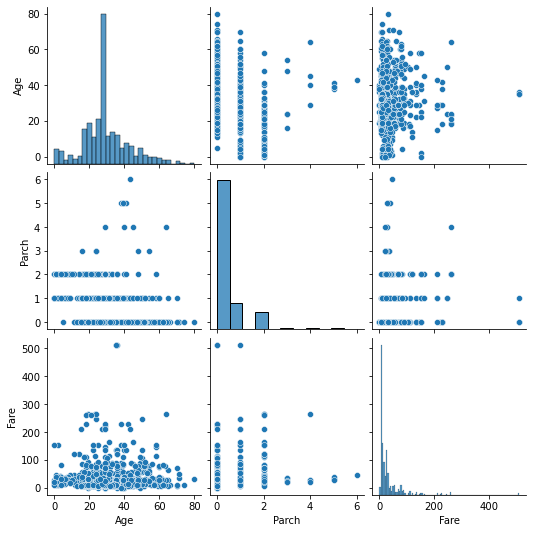

In [15]:
sb.pairplot(train)

In [16]:
def bernoulli(p,q):
    x=1
    s=(p/(p+q))
    f=(q/(p+q))
    pmf=(s**x)*(f**(1-x))
    v=s*f
    print("Mean-{}".format(round(s,2)))
    print("Variance-{}".format(round(v,2)))
    print("!!Probability of surviving if boarded a Titanic!!")
    return round(pmf,2)    

In [17]:
q=((train[train['Survived']=='0']).shape)[0]
p=((train[train['Survived']=='1']).shape)[0]

# Prob of Survival in Titanic

In [18]:
(bernoulli(p,q))*100

Mean-0.38
Variance-0.24
!!Probability of surviving if boarded a Titanic!!


38.0

In [19]:
pclassunique=(train['Pclass'].unique())

In [20]:
survived=train[train['Survived']=='1']
a=((survived[survived['Pclass']==pclassunique[1]]).shape)[0]
b=((survived[survived['Pclass']==pclassunique[2]]).shape)[0]
c=((survived[survived['Pclass']==pclassunique[0]]).shape)[0]


In [21]:
train['Embarked']=train['Embarked'].fillna('Q')

In [22]:
total=p+q
surviving=round(p/total,2) #prob of surviving
pclass1=round(a/total,2) #prob of being in class 1
pclass2=round(b/total,2) #prob of being in class 2
pclass3=round(c/total,2) #prob of being in class 3

In [23]:
#prob of surviving and in class 1
p1survive=round((pclass1/surviving),2)
#prob of surviving and in class 2
p2survive=round((pclass2/surviving),2)
#prob of surviving and in class 3
p3survive=round((pclass3/surviving),2)

In [24]:
#Prob of surviving basis class
p1=((pclass1*p1survive)/((pclass1*p1survive)+(pclass2*p2survive)+(pclass3*p3survive)))
p2=((pclass2*p2survive)/((pclass1*p1survive)+(pclass2*p2survive)+(pclass3*p3survive)))
p3=((pclass3*p3survive)/((pclass1*p1survive)+(pclass2*p2survive)+(pclass3*p3survive)))

# Prob of surviving basis class

In [25]:
print("\nProb of surviving in class 1-", round(p1,2)*100,"%","\nProb of surviving in class 2-", round(p2,2)*100,"%","\nProb of surviving in class 3-",round(p3,2)*100,"%")


Prob of surviving in class 1- 45.0 % 
Prob of surviving in class 2- 20.0 % 
Prob of surviving in class 3- 34.0 %


More chances of survival if travelling in Class 1

# Age, Fare and Survival distribution

C:\Users\Ajit Jain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

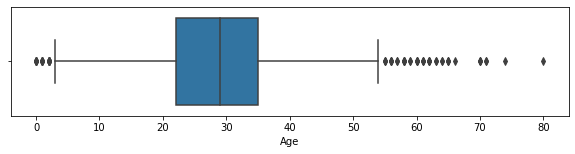

In [26]:
plt.figure(figsize=(10,2))
sb.boxplot(train['Age'])

C:\Users\Ajit Jain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

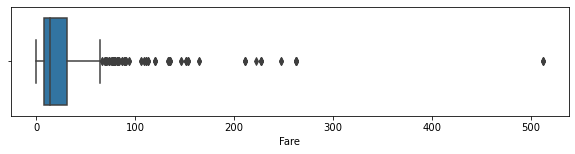

In [27]:
plt.figure(figsize=(10,2))
sb.boxplot(train['Fare'])

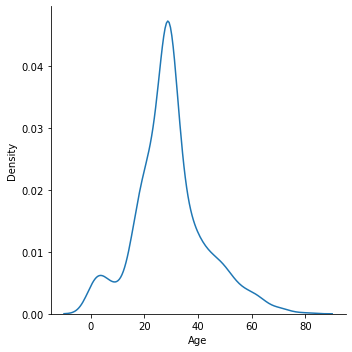

In [28]:
#Age Distribution
sb.displot(train['Age'],kind='kde')

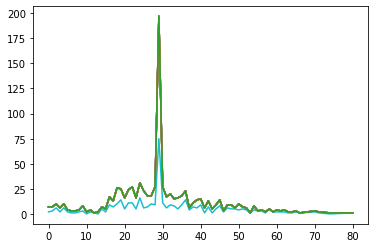

In [74]:
plt.plot(train.groupby(by=['Age']).count())

<AxesSubplot:xlabel='Age', ylabel='Count'>

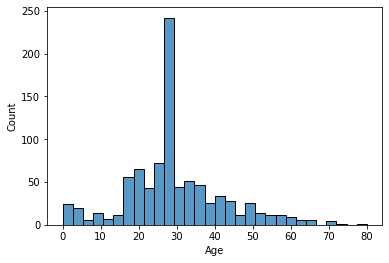

In [30]:
sb.histplot(train['Age'])

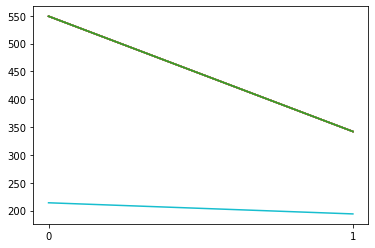

In [75]:
plt.plot(train.groupby(by=['Survived']).count())

<AxesSubplot:xlabel='Survived', ylabel='Count'>

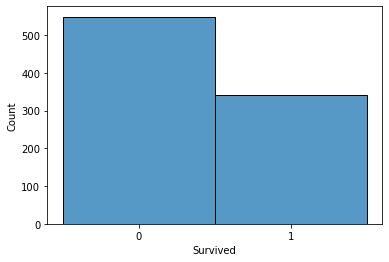

In [32]:
#Survived Count
sb.histplot(train['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

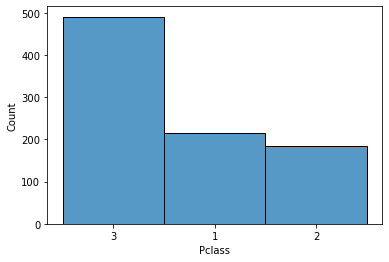

In [33]:
sb.histplot(train['Pclass'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

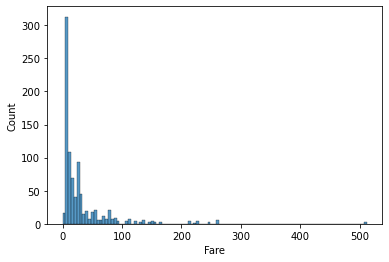

In [34]:
sb.histplot(train['Fare'])

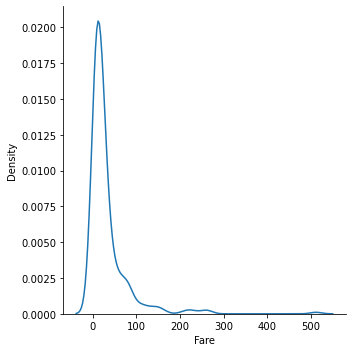

In [35]:
sb.displot(train['Fare'],kind='kde')

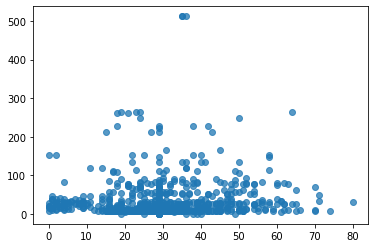

In [36]:
plt.scatter(train['Age'],train['Fare'] ,cmap='hsv', alpha=0.75)


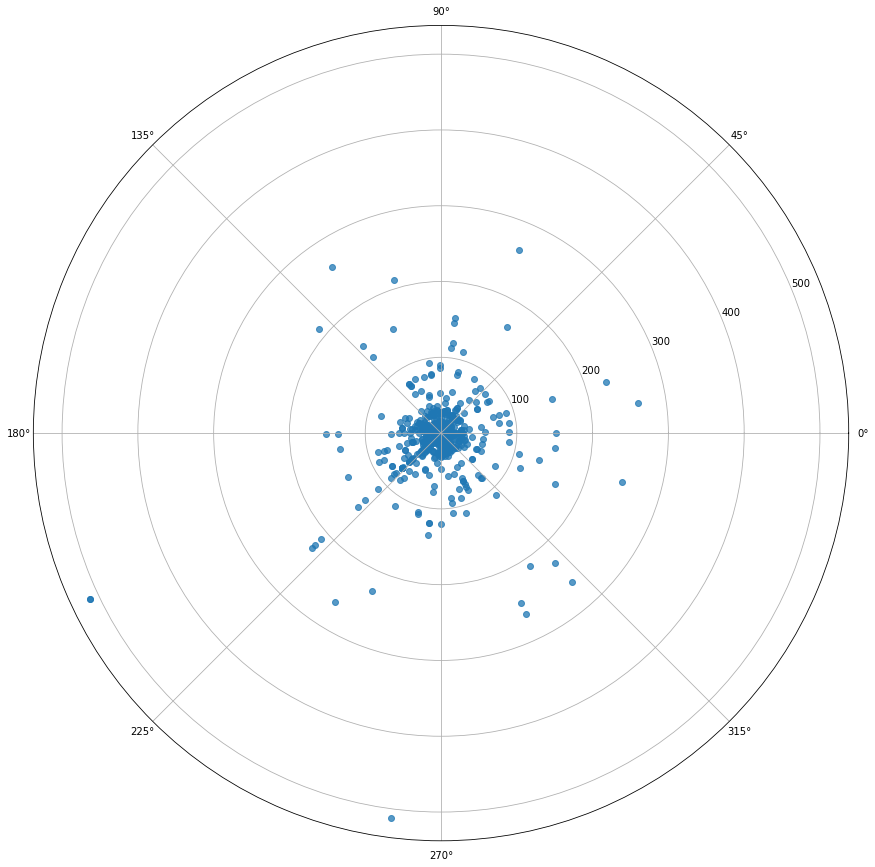

In [37]:
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(projection='polar')
c = ax.scatter(train['Age'],train['Fare'], cmap='hsv', alpha=0.75)


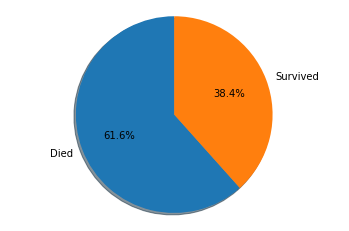

In [38]:
labels = ['Died','Survived']
fig1, ax1 = plt.subplots()
ax1.pie(train['Survived'].value_counts(), labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

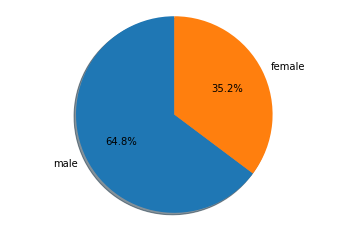

In [39]:
labels = train['Sex'].unique()
fig1, ax1 = plt.subplots()
ax1.pie(train['Sex'].value_counts(), labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

# Prob of Surviving basis Gender

In [40]:
psexunique=(train['Sex'].unique())

survived=train[train['Survived']=='1']
male=(survived[survived['Sex']==(train['Sex'].unique())[0]]).shape[0]
female=(survived[survived['Sex']==(train['Sex'].unique())[1]]).shape[0]

total=p+q
surviving=(p/total) #prob of surviving
pmale=(male/total) #prob of being male
pfemale=(female/total) #prob of being female
#prob of surviving and Male
pmalesurvive=(pmale/surviving)
#prob of surviving and Female
pfemalesurvive=(pfemale/surviving)
#Prob of surviving basis class
psmale=((pmale*pmalesurvive)/((pmale*pmalesurvive)+(pfemale*pfemalesurvive)))
psfemale=((pfemale*pfemalesurvive)/((pmale*p1survive)+(pfemale*pfemalesurvive)))
# Prob of surviving basis Gender
print("\nProb of surviving male-", round(psmale,2)*100,"%","\nProb of surviving female-", round(psfemale,2)*100,"%")


Prob of surviving male- 18.0 % 
Prob of surviving female- 79.0 %


More chances of survival if being a Female

# Travel's Family status and Solo travelers

In [41]:
ticketunique=train.drop_duplicates(subset='Ticket',keep='last')
trainduplicate=train[~train.index.isin(ticketunique.index)]
Family=train[train.Ticket.isin(trainduplicate.Ticket)]
train['Trip_Status']=np.where(train.index.isin(Family.index),"Family","Solo")

In [42]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Trip_Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,C85,S,Solo
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Solo
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,C123,S,Solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,E46,S,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,Solo
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,Solo
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,NaN,S,Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,Solo


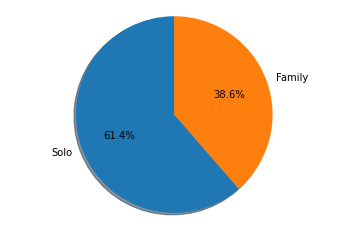

In [43]:
labels = train['Trip_Status'].unique()
fig1, ax1 = plt.subplots()
ax1.pie(train['Trip_Status'].value_counts(), labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

# Age Catagory Analysis

In [44]:
train['Age_Catagory']= train['Age'].apply(lambda i : (i >=60 and "Senior") or 
                                                (18<= i  and 'Adult') or 
                                                (13<= i  and 'Youth') or 
                                                (13 > i and 'Child'))

In [45]:
train['Age_Catagory'].value_counts().T

Adult     752
Child      69
Youth      44
Senior     26
Name: Age_Catagory, dtype: int64

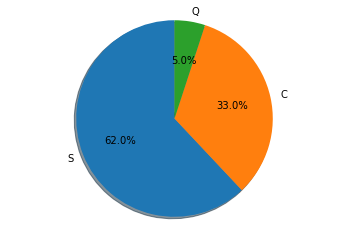

In [46]:
(Family[Family['Survived']=='1'])
labels =(Family[Family['Survived']=='1'])['Embarked'].unique()
fig1, ax1 = plt.subplots()
ax1.pie((Family[Family['Survived']=='1'])['Embarked'].value_counts(), labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

Family Travellers  boarded from "S" Embarkement were maximum survivors

In [47]:
#Traveller from embarkment

In [48]:
#Traveller from embarkment- Survived

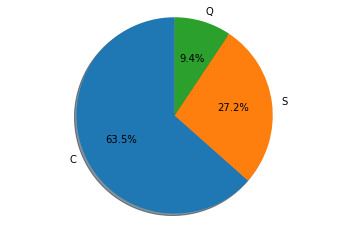

In [49]:
(train[train['Survived']=='1'])
labels =(train[train['Survived']=='1'])['Embarked'].unique()
fig1, ax1 = plt.subplots()
ax1.pie((train[train['Survived']=='1'])['Embarked'].value_counts(), labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

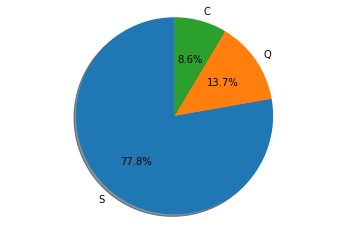

In [50]:
#Traveller from embarkment- Died
(train[train['Survived']=='0'])
labels =(train[train['Survived']=='0'])['Embarked'].unique()
fig1, ax1 = plt.subplots()
ax1.pie((train[train['Survived']=='0'])['Embarked'].value_counts(), labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [51]:
#Solo traveller from embarkment

In [52]:
solo=train[train['Trip_Status']=='Solo']

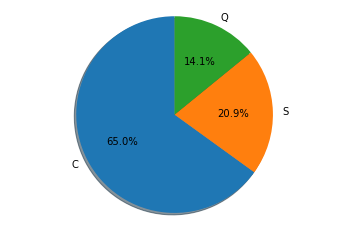

In [53]:
(solo[solo['Survived']=='1'])
labels =(solo[solo['Survived']=='1'])['Embarked'].unique()
fig1, ax1 = plt.subplots()
ax1.pie((solo[solo['Survived']=='1'])['Embarked'].value_counts(), labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

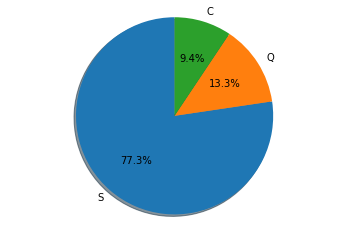

In [54]:
(solo[solo['Survived']=='0'])
labels =(solo[solo['Survived']=='0'])['Embarked'].unique()
fig1, ax1 = plt.subplots()
ax1.pie((solo[solo['Survived']=='0'])['Embarked'].value_counts(), labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

# Prob of Surviving basis Travel Status - Family or Solo

In [55]:
ptsunique=(train['Trip_Status'].unique())

survived=train[train['Survived']=='1']
solo=(survived[survived['Trip_Status']==(train['Trip_Status'].unique())[0]]).shape[0]
family=(survived[survived['Trip_Status']==(train['Trip_Status'].unique())[1]]).shape[0]

total=p+q
surviving=(p/total) #prob of surviving
psolo=(solo/total) #prob of being solo
pfamily=(family/total) #prob of being family
#prob of surviving and solo
psolusurvive=(psolo/surviving)
#prob of surviving and Family
pfamilysurvive=(pfamily/surviving)
#Prob of surviving basis traveller status
pssolo=((psolo*psolusurvive)/((psolo*psolusurvive)+(pfemale*pfamilysurvive)))
psfamily=((pfamily*pfamilysurvive)/((pmale*psolusurvive)+(pfamily*pfamilysurvive)))
# Prob of surviving basis Family traveller and solo
print("\nProb of surviving solo-", round(pssolo,2)*100,"%","\nProb of surviving family member-", round(psfamily,2)*100,"%")


Prob of surviving solo- 39.0 % 
Prob of surviving family member- 64.0 %


More chances of survival for Family Travellers

In [160]:
Family['Survived']

3      1
7      0
8      1
9      1
10     1
      ..
876    0
879    1
880    1
885    0
888    0
Name: Survived, Length: 344, dtype: object

In [57]:
f=Family[Family['Survived']=='1']
(f[f['Sex']=='female']).shape

(133, 12)

In [58]:
succes=179/344

In [59]:
succes

0.5203488372093024

In [60]:
stats.binom.pmf(133,344,0.52)

1.9740926329600074e-07

In [61]:
stats.poisson.cdf(133,344)

1.0082797002781893e-38

In [73]:
x= float("1.0082797002781893e-38")
print( "%.200f" % (x))

0.00000000000000000000000000000000000001008279700278189286880549331285148702368022786974935924344131546543422961400599966084326888340807343302785170635615941137075424194335937500000000000000000000000000


In [76]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Trip_Status,Age_Catagory
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,C85,S,Solo,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Solo,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,C123,S,Solo,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Family,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,E46,S,Solo,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,Solo,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,Solo,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,NaN,S,Family,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,Solo,Adult


In [154]:
Family_detail_tabel=pd.pivot_table(Family, index =['Ticket','Sex','Age','Parch','SibSp','Survived','Pclass','Cabin','Embarked'],values =['Fare'],aggfunc='sum')


In [155]:
Family_detail_tabel.head(60)

Fare
Ticket Sex    Age Parch SibSp Survived Pclass Cabin       Embarked          
110152 female 16  0     0     1        1      B79         S          86.5000
              30  0     0     1        1      B77         S          86.5000
              33  0     0     1        1      B77         S          86.5000
110413 female 18  2     0     1        1      E68         S          79.6500
              39  1     1     1        1      E67         S          79.6500
       male   52  1     1     0        1      E67         S          79.6500
110465 male   29  0     0     0        1      A14         S          52.0000
              47  0     0     0        1      C110        S          52.0000
111361 female 16  1     0     1        1      B18         C          57.9792
              44  1     0     1        1      B18         C          57.9792
113505 female 22  1     0     1        1      E33         S          55.0000
              29  1     0     1        1      E33         S          55.0000
113572 female 38  0     0     1        1      B28         Q          80.0000
              62  0     0     1        1      B28         Q          80.0000
113760 female 14  2     1     1        1      B96 B98     S         120.0000
              36  2     1     1        1      B96 B98     S         120.0000
       male   11  2     1     1        1      B96 B98     S         120.0000
              36  2     1     1        1      B96 B98     S         120.0000
113776 female 22  0     1     1        1      C2          S          66.6000
       male   29  0     1     0        1      C2          S          66.6000
113781 female 2   2     1     0        1      C22 C26     S         151.5500
              25  2     1     0        1      C22 C26     S         151.5500
       male   0   2     1     1        1      C22 C26     S         151.5500
113789 male   42  0     1     0        1      D47         S          52.0000
113803 female 35  0     1     1        1      C123        S          53.1000
       male   37  0     1     0        1      C123        S          53.1000
113806 female 33  0     1     1        1      E8          S          53.1000
       male   27  0     1     1        1      E8          S          53.1000
11668  female 27  0     1     0        2      B19         S          21.0000
       male   29  0     1     0        2      B96 B98     S          21.0000
11751  female 47  1     1     1        1      D35         S          52.5542
       male   37  1     1     1        1      D35         S          52.5542
11767  female 24  0     0     1        1      C54         C          83.1583
              56  1     0     1        1      C50         C          83.1583
11967  female 19  0     1     1        1      B49         C          91.0792
       male   25  0     1     1        1      B49         C          91.0792
12749  female 30  0     0     1        1      B73         S          93.5000
              52  1     1     1        1      B69         S          93.5000
13502  female 21  0     0     1        1      D9          S          77.9583
              51  0     1     1        1      D11         S          77.9583
              63  0     1     1        1      D7          S          77.9583
13507  female 39  0     1     1        1      E44         S          55.9000
       male   50  0     1     0        1      E44         S          55.9000
1601   male   28  0     0     0        3      C125        S          56.4958
              32  0     0     1        3      D           S          56.4958
16966  female 40  1     1     1        1      E34         C         134.5000
              41  0     0     1        1      E40         C         134.5000
17421  female 39  1     1     1        1      C68         C         110.8833
       male   17  2     0     1        1      C70         C         110.8833
              49  1     1     0        1      C68         C         110.8833
17453  female 29  0     1     1        1      C92         C         

In [159]:
train[train['Age']<18]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Trip_Status,Age_Catagory
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,C103,S,Family,Child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,A6,C,Family,Youth
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,Family,Child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,D33,S,Solo,Youth
16,17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,C52,Q,Family,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4,4,2,347082,31.2750,NaN,S,Family,Child
852,853,0,3,"Boulos, Miss. Nourelain",female,9,1,1,2678,15.2458,NaN,C,Family,Child
853,854,1,1,"Lines, Miss. Mary Conover",female,16,0,1,PC 17592,39.4000,D28,S,Solo,Youth
869,870,1,3,"Johnson, Master. Harold Theodor",male,4,1,1,347742,11.1333,NaN,S,Family,Child
